In [97]:
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [98]:
k,gamma,D = 1.0,1.0,1.0
delta_t=0.01
ampl = np.sqrt(2*D*delta_t)

In [99]:
# random force
w=np.random.normal(0,1,10000)

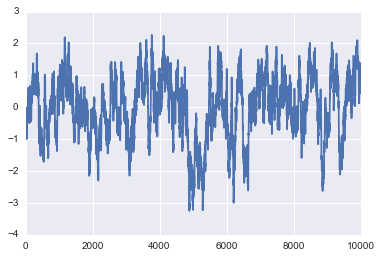

In [100]:
# differential equation x_i = x_(i-1) - k/gamma*x_(i-1) + sqrt(2*D*delta_t)*w_i
from itertools import accumulate
def next_point(x,y):
    return x - k/gamma*x*delta_t + ampl*y

x = np.fromiter(accumulate(w, next_point),np.float)
plt.plot(x)

In [101]:
print("std: ",x.std(),"mean: ",x.mean())

std:  0.977630107977 mean:  -0.0259991790272


In [102]:
# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.fftconvolve.html
from scipy import signal
autocorr = signal.fftconvolve(x, x[::-1], mode='full')

19999


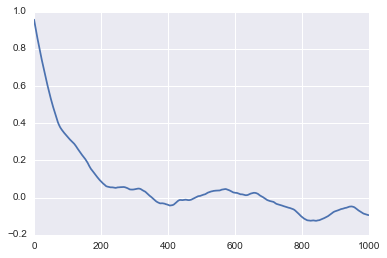

In [103]:
n=len(autocorr)
print(n)
autocorr=autocorr[int((n-1)/2):]*2.0/(n+1)
plt.plot(autocorr[:1000])

In [104]:
import lmfit as lm

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 1000
    # variables        = 2
    chi-square         = 2.422
    reduced chi-square = 0.002
    Akaike info crit   = -6017.247
    Bayesian info crit = -6007.432
[[Variables]]
    amplitude:   0.95013075 +/- 0.010232 (1.08%) (init= 0.1187892)
    decay:       90.6871744 +/- 1.388824 (1.53%) (init= 647.8097)
[[Correlations]] (unreported correlations are <  0.250)
    C(amplitude, decay)          = -0.703 



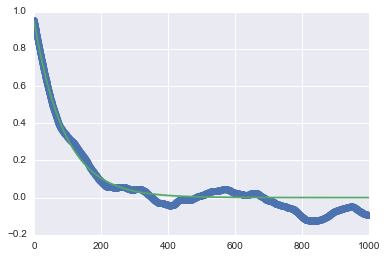

In [105]:
from lmfit.models import ExponentialModel

mod = ExponentialModel()
y = autocorr[:1000]
t = np.arange(1000)

pars = mod.guess(y, x=t)
out  = mod.fit(y, pars, x=t)
print(out.fit_report(min_correl=0.25))

plt.plot(t,y,"o")
plt.plot(t,out.best_fit)